# Map the 2019 Novel Coronavirus Globally

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Read-Google-Spreadsheet-as-a-DataFrame" data-toc-modified-id="1.-Read-Google-Spreadsheet-as-a-DataFrame-1">1. Read Google Spreadsheet as a DataFrame</a></span><ul class="toc-item"><li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-1.1">Necessary Imports</a></span></li><li><span><a href="#Read-Google-Sheet-into-DataFrame" data-toc-modified-id="Read-Google-Sheet-into-DataFrame-1.2">Read Google Sheet into DataFrame</a></span></li><li><span><a href="#Split-DataFrame-into-subsets-per-administrative-unit" data-toc-modified-id="Split-DataFrame-into-subsets-per-administrative-unit-1.3">Split DataFrame into subsets per administrative unit</a></span></li></ul></li><li><span><a href="#2.-Map-the-COVID-19-cases-in-China" data-toc-modified-id="2.-Map-the-COVID-19-cases-in-China-2">2. Map the COVID-19 cases in China</a></span><ul class="toc-item"><li><span><a href="#Access-Feature-Service-and-Merge" data-toc-modified-id="Access-Feature-Service-and-Merge-2.1">Access Feature Service and Merge</a></span></li><li><span><a href="#Map-the-confirmed-COVID-19-cases" data-toc-modified-id="Map-the-confirmed-COVID-19-cases-2.2">Map the confirmed COVID-19 cases</a></span></li><li><span><a href="#Map-the-Deaths-caused-by-COVID-19" data-toc-modified-id="Map-the-Deaths-caused-by-COVID-19-2.3">Map the Deaths caused by COVID-19</a></span></li></ul></li><li><span><a href="#3.-Map-the-COVID-19-cases-in-other-countries-or-regions" data-toc-modified-id="3.-Map-the-COVID-19-cases-in-other-countries-or-regions-3">3. Map the COVID-19 cases in other countries or regions</a></span><ul class="toc-item"><li><span><a href="#Access-Feature-Service-and-merge" data-toc-modified-id="Access-Feature-Service-and-merge-3.1">Access Feature Service and merge</a></span></li><li><span><a href="#Map-the-confirmed-COVID-19-cases-in-other-countries-or-regions" data-toc-modified-id="Map-the-confirmed-COVID-19-cases-in-other-countries-or-regions-3.2">Map the confirmed COVID-19 cases in other countries or regions</a></span></li></ul></li><li><span><a href="#4.-Map-the-COVID-19-cases-In-the-U.S." data-toc-modified-id="4.-Map-the-COVID-19-cases-In-the-U.S.-4">4. Map the COVID-19 cases In the U.S.</a></span><ul class="toc-item"><li><span><a href="#Access-feature-service,-and-merge" data-toc-modified-id="Access-feature-service,-and-merge-4.1">Access feature service, and merge</a></span></li><li><span><a href="#Map-the-confirmed-COVID-19-cases-in-U.-S." data-toc-modified-id="Map-the-confirmed-COVID-19-cases-in-U.-S.-4.2">Map the confirmed COVID-19 cases in U. S.</a></span></li></ul></li><li><span><a href="#5.-What's-next?" data-toc-modified-id="5.-What's-next?-5">5. What's next?</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

2019 Novel Corona Virus (**COVID-19**) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. 

Infections with COVID-19, most of them associated with travel from Wuhan, also are being reported in a growing number of international locations, including the United States. Some person-to-person spread of this virus outside China has been detected. The United States reported the first confirmed instance of person-to-person spread with this virus on January 30, 2020.

This notebook is to guide you through the steps in monitoring the situations of the COVID-19 across the globe.

## 1. Read Google Spreadsheet as a DataFrame

The Google Sheet to be used as reference is made and maintained by the **Johns Hopkins CSSE**, and their maps can be viewed <a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6">here</a>. In this notebook, we will use the data collected in the Google Sheet, and provide a different perspective in viewing the global maps of COVID-19 via ArcGIS API for Python.

### Necessary Imports

In [1]:
from io import BytesIO
import requests
import pandas as pd

### Read Google Sheet into DataFrame

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/export?usp=sharing&sle=true&format=csv'
data = requests.get(sheet_url).content

In [3]:
df = pd.read_csv(BytesIO(data), parse_dates=['Last Update'])
df.head()

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
0          Hubei  Mainland China 2020-02-06 12:33:00      19665     549   
1      Guangdong  Mainland China 2020-02-06 12:43:00        970       0   
2       Zhejiang  Mainland China 2020-02-06 10:53:00        954       0   
3          Henan  Mainland China 2020-02-06 11:23:00        851       2   
4          Hunan  Mainland China 2020-02-06 13:13:00        711       0   

   Recovered  
0        712  
1         69  
2         94  
3         56  
4         81

In [4]:
df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

### Split DataFrame into subsets per administrative unit

Next, we will split the entire DataFrame `df` that is being created from the Google Sheet into small subsets for visualization purposes. Note that, a new column `NAME` is created to be used as a common key for merging operations to be performed in the following section.

We are to split the original DataFrame into four subsets based on the administrative units:
  1. for Mainland China, number of cases are reported per province; 
  2. for most of the regions and countries outside of Mainland China, number of cases are summarized per region/country (e.g. we are seeing Belgium as a country/region being reported here); 
  3. for cities/counties with significant number of cases outside of Mainland China, number of cases are reported per single city or county (e.g. Madison, WI in the U.S. is listed individually here); 
  4. the last record in the DataFrame lists Cruise Ship since the Diamond Princess cruise ship itself contains a considerable amount of confirmed cases.

In [6]:
df1 = df[df["Country/Region"].isin(["Mainland China", "Taiwan", "Hong Kong", "Macau"])]
df1 = df1.assign(NAME = df1["Province/State"])
df1.head()

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
0          Hubei  Mainland China 2020-02-06 12:33:00      19665     549   
1      Guangdong  Mainland China 2020-02-06 12:43:00        970       0   
2       Zhejiang  Mainland China 2020-02-06 10:53:00        954       0   
3          Henan  Mainland China 2020-02-06 11:23:00        851       2   
4          Hunan  Mainland China 2020-02-06 13:13:00        711       0   

   Recovered       NAME  
0        712      Hubei  
1         69  Guangdong  
2         94   Zhejiang  
3         56      Henan  
4         81      Hunan

Because there are some inconsistencies in the naming of some provinces, the `replace_value_in_column` function is defined to replace the original name value `l_value` with a new value `r_value`.

In [7]:
def replace_value_in_column(data_frame, l_value, r_value, column_name = 'NAME'):
    data_frame.loc[data_frame[column_name] == l_value, column_name] = r_value
    display(data_frame[data_frame[column_name] == r_value])

In [8]:
replace_value_in_column(df1, 'Guangxi', 'Guangxi Zhuang Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
16        Guangxi  Mainland China 2020-02-06 04:13:00        168       0   

    Recovered                              NAME  
16         14  Guangxi Zhuang Autonomous Region

In [9]:
replace_value_in_column(df1, 'Inner Mongolia', 'Inner Mongolia Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
26  Inner Mongolia  Mainland China 2020-02-06 02:23:00         46       0   

    Recovered                              NAME  
26          4  Inner Mongolia Autonomous Region

In [10]:
replace_value_in_column(df1, 'Ningxia', 'Ningxia Hui Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
28        Ningxia  Mainland China 2020-02-06 02:13:00         40       0   

    Recovered                           NAME  
28          1  Ningxia Hui Autonomous Region

In [11]:
replace_value_in_column(df1, 'Tibet', 'Tibet Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
60          Tibet  Mainland China 2020-02-01 01:52:00          1       0   

    Recovered                     NAME  
60          0  Tibet Autonomous Region

Apart from `df1` being extracted as the first subset, we can also create two other subset from `df` to represent (1) countries/regions with at least 1 confirmed COVID-19 case(s), and (2) cities in countries/regions outside of China that are listed with at least 1 confirmed COVID-19 case(s).

In [12]:
df_foreign_areas = df
cond = df_foreign_areas["Province/State"].isin(df1["Province/State"]) == True
df_foreign_areas.drop(df_foreign_areas[cond].index, inplace = True)
df_foreign_areas.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
27            NaN          Japan 2020-02-06 02:53:00         45       0   
30            NaN      Singapore 2020-02-05 16:33:00         28       0   
31            NaN       Thailand 2020-02-04 15:33:00         25       0   
33            NaN    South Korea 2020-02-06 02:53:00         23       0   
36            NaN        Germany 2020-02-03 20:53:00         12       0   

    Recovered  
27          1  
30          0  
31          5  
33          0  
36          0

In [14]:
df2 = df_foreign_areas[df_foreign_areas["Province/State"].notnull()]
df2.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
42   New South Wales      Australia 2020-02-06 03:13:00          4       0   
43        Queensland      Australia 2020-02-06 02:53:00          4       0   
44          Victoria      Australia 2020-02-01 18:12:00          4       0   
46   South Australia      Australia 2020-02-02 22:33:00          2       0   
47  British Columbia         Canada 2020-02-05 17:33:00          2       0   

    Recovered  
42          2  
43          0  
44          0  
46          0  
47          0

In [17]:
df2 = df2.assign(name = df2["Province/State"])
df2.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
42   New South Wales      Australia 2020-02-06 03:13:00          4       0   
43        Queensland      Australia 2020-02-06 02:53:00          4       0   
44          Victoria      Australia 2020-02-01 18:12:00          4       0   
46   South Australia      Australia 2020-02-02 22:33:00          2       0   
47  British Columbia         Canada 2020-02-05 17:33:00          2       0   

    Recovered              name  
42          2   New South Wales  
43          0        Queensland  
44          0          Victoria  
46          0   South Australia  
47          0  British Columbia

In [16]:
df3 = df_foreign_areas[df_foreign_areas["Province/State"].isnull()]
df3.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
27            NaN          Japan 2020-02-06 02:53:00         45       0   
30            NaN      Singapore 2020-02-05 16:33:00         28       0   
31            NaN       Thailand 2020-02-04 15:33:00         25       0   
33            NaN    South Korea 2020-02-06 02:53:00         23       0   
36            NaN        Germany 2020-02-03 20:53:00         12       0   

    Recovered  
27          1  
30          0  
31          5  
33          0  
36          0

In [18]:
df3 = df3.assign(Country = df3['Country/Region'])
df3.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
27            NaN          Japan 2020-02-06 02:53:00         45       0   
30            NaN      Singapore 2020-02-05 16:33:00         28       0   
31            NaN       Thailand 2020-02-04 15:33:00         25       0   
33            NaN    South Korea 2020-02-06 02:53:00         23       0   
36            NaN        Germany 2020-02-03 20:53:00         12       0   

    Recovered      Country  
27          1        Japan  
30          0    Singapore  
31          5     Thailand  
33          0  South Korea  
36          0      Germany

## 2. Map the COVID-19 cases in China

The subsets of dataframe being created in the previous section would need to be merged with feature services which have geographic information (e.g. geometries, shape, or longitude/latitude) in order to provide locaton and geometries for mapping. First, let's acquire the geometries from feature services existing on living atlas to represent the geographic information needed of `df1`.

### Access Feature Service and Merge

In [60]:
from arcgis.gis import GIS
import json

gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

In [61]:
provinces_item = gis.content.get('461458d41e7b422e885fb8cc3ab361ab')

In [62]:
provinces_flayer = provinces_item.layers[0]
provinces_fset = provinces_flayer.query()
provinces_fset.sdf.columns

Index(['OBJECTID', 'ID', 'NAME', 'AREA', 'TOTPOP_CY', 'ISO_CODE', 'ISO_SUB',
       'ISO2_CC', 'ISO3_CC', 'Shape__Area', 'Shape__Length', 'ID_1',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'TOTPOP_CY_1', 'SHAPE'],
      dtype='object')

In [63]:
cols_2 = ['NAME', 'AREA', 'TOTPOP_CY','SHAPE','Shape__Area', 'Shape__Length']
overlap_rows = pd.merge(left = provinces_fset.sdf[cols_2], right = df1, how='inner',
                        on = 'NAME')
overlap_rows.head(3)

NAME           AREA  TOTPOP_CY  \
0  Beijing   16535.530210   21933363   
1  Tianjin   11623.865583   15535310   
2    Hebei  187381.031183   74961654   

                                               SHAPE  Shape__Area  \
0  {'rings': [[[116.817586898717, 39.614297867152...     1.748578   
1  {'rings': [[[117.385320663218, 40.226179123367...     1.213896   
2  {'rings': [[[114.12208366363, 40.7417316435006...    19.643388   

   Shape__Length Province/State  Country/Region         Last Update  \
0       9.056859        Beijing  Mainland China 2020-02-06 03:23:00   
1       8.534763        Tianjin  Mainland China 2020-02-06 06:23:00   
2      51.344150          Hebei  Mainland China 2020-02-06 13:53:00   

   Confirmed  Deaths  Recovered  
0        274       1         31  
1         78       1          2  
2        157       1         13

### Map the confirmed COVID-19 cases

In [64]:
map1 = gis.map('China')
map1

MapView(layout=Layout(height='400px', width='100%'))

The Map view above (map1) displays the number of confirmed cases per province in Mainland China, and it should look like - 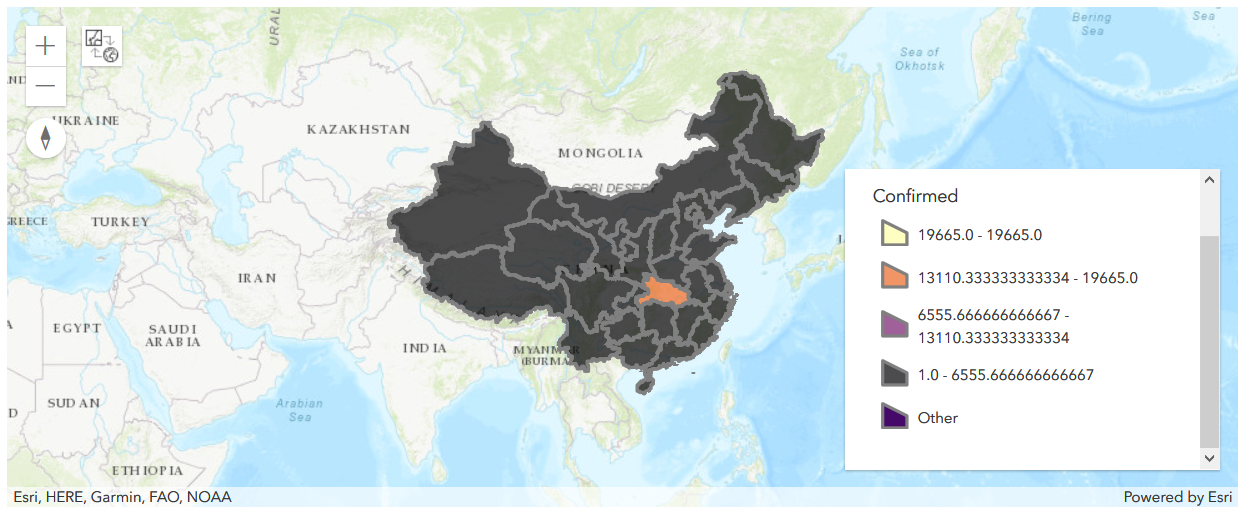

In [66]:
map1.clear_graphics()
overlap_rows.spatial.plot(kind='map', map_widget=map1,
                          renderer_type='c',  # for class breaks renderer
                          method='esriClassifyNaturalBreaks',  # classification algorithm
                          class_count=4,  # choose the number of classes
                          col='Confirmed',  # numeric column to classify
                          cmap='inferno',  # color map to pick colors from for each class
                          alpha=0.7  # specify opacity
                         )

True

In [67]:
map1.zoom = 4
map1.legend=True

### Map the Deaths caused by COVID-19

In [68]:
map2 = gis.map('China')
map2

MapView(layout=Layout(height='400px', width='100%'))

Using the same approaches, we can then map the number of death cases per province in Mainland China. With legend displayed, `map2` should look like - 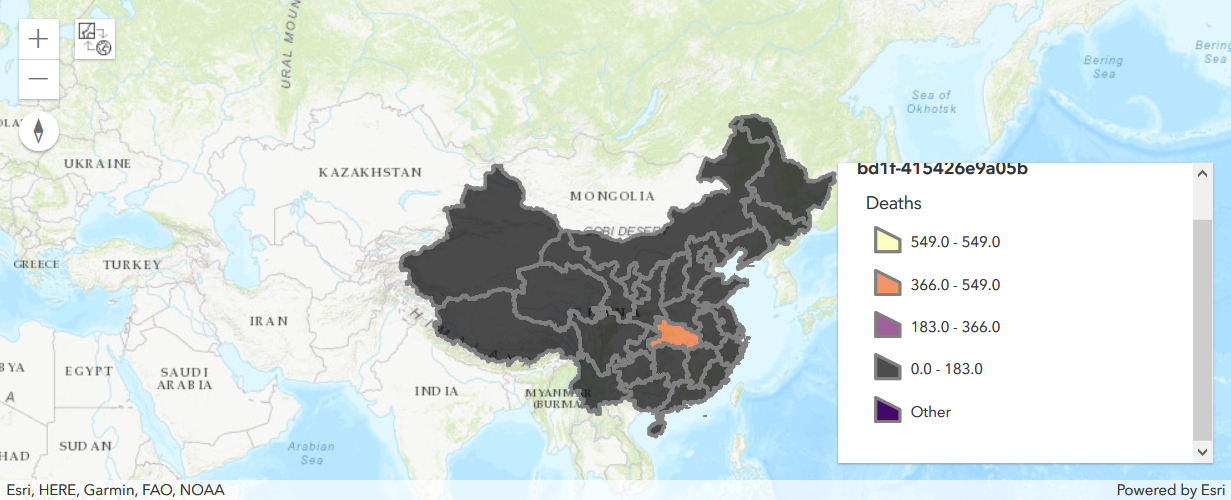

In [69]:
map2.clear_graphics()
overlap_rows.spatial.plot(kind='map', map_widget=map2,
                          renderer_type='c',  # for class breaks renderer
                          method='esriClassifyNaturalBreaks',  # classification algorithm
                          class_count=4,  # choose the number of classes
                          col='Deaths',  # numeric column to classify
                          cmap='inferno',  # color map to pick colors from for each class
                          alpha=0.7  # specify opacity
                         )

True

In [70]:
map2.zoom = 4
map2.legend = True

## 3. Map the COVID-19 cases in other countries or regions

### Access Feature Service and merge

<Item title:"World Countries (Generalized)" type:Feature Layer Collection owner:esri_dm>
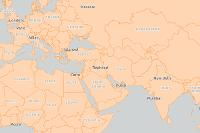

In [41]:
countries_item = gis.content.get('2b93b06dc0dc4e809d3c8db5cb96ba69')
countries_item

In [47]:
countries_flayer = countries_item.layers[0]
countries_fset = countries_flayer.query()
countries_fset.sdf['Country'].head()

0    Falkland Islands
1       French Guiana
2              Guyana
3              Cyprus
4            Pitcairn
Name: Country, dtype: object

In [48]:
countries_fset.sdf.columns

Index(['FID', 'Country', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'SHAPE'], dtype='object')

In [50]:
cols_3 = ['Country','SHAPE']
overlap_rows2 = pd.merge(left = countries_fset.sdf[cols_3], right = df3, how='inner',
                         on = 'Country')
overlap_rows2.head()

Country                                              SHAPE Province/State  \
0  Belgium  {'rings': [[[461890.852559879, 6442531.2973954...            NaN   
1   France  {'rings': [[[198339.953048275, 5246743.3982777...            NaN   
2  Germany  {'rings': [[[856850.402995652, 6031214.2215942...            NaN   
3  Finland  {'rings': [[[2562273.13104857, 8422307.5472190...            NaN   
4    India  {'rings': [[[7591744.40072868, 2725002.9746044...            NaN   

  Country/Region         Last Update  Confirmed  Deaths  Recovered  
0        Belgium 2020-02-04 15:43:00          1       0          0  
1         France 2020-02-01 01:52:00          6       0          0  
2        Germany 2020-02-03 20:53:00         12       0          0  
3        Finland 2020-01-31 08:15:00          1       0          0  
4          India 2020-02-03 21:43:00          3       0          0

### Map the confirmed COVID-19 cases in other countries or regions

Of the four administrative units splitting of the original data, now we have done with the 1st situation - "for Mainland China, number of cases are reported per province", and now let's go onto map the 2nd situation.
  2. for most of the regions and countries outside of Mainland China, number of cases are summarized per region/country (e.g. we are seeing Belgium as a country/region being reported here); 

In [79]:
map1b = gis.map("Japan")
map1b

MapView(layout=Layout(height='400px', width='100%'))

With the map created centering Japan, and the merged DataFrame plotted with symbologies being overlayed on top, we should be seeing the map such as - 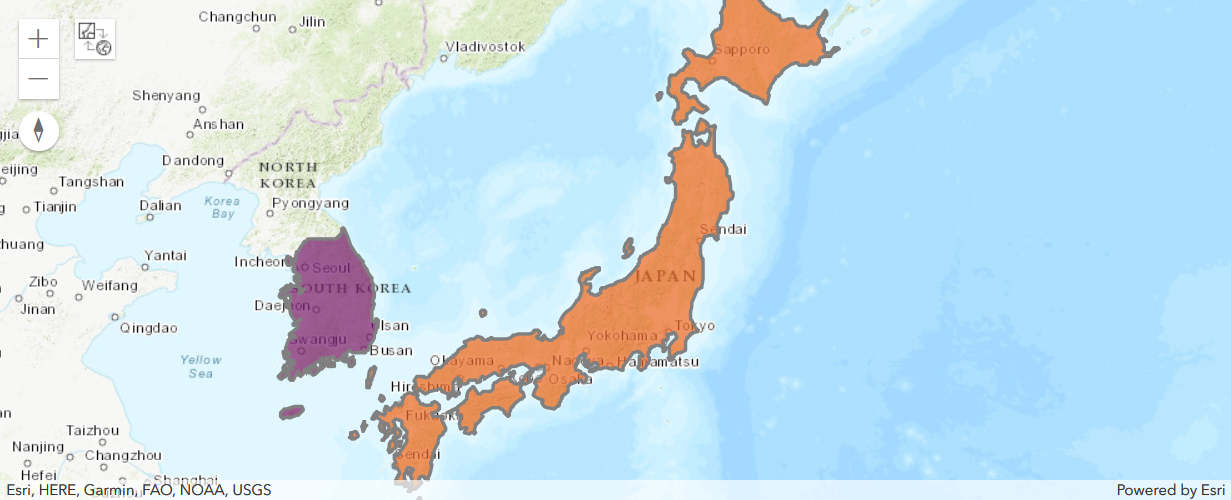

In [80]:
overlap_rows2.spatial.plot(kind='map', map_widget=map1b,
                           renderer_type='c',  # for class breaks renderer
                           method='esriClassifyNaturalBreaks',  # classification algorithm
                           class_count=4,  # choose the number of classes
                           col='Confirmed',  # numeric column to classify
                           cmap='inferno',  # color map to pick colors from for each class
                           alpha=0.7  # specify opacity
                          )

True

If visualization is not enough for your use, you can also save the map view object into a Feature Collection Item.

In [44]:
item_properties = {
    "title": "Corona Viruses Map 2",
    "tags" : "virus",
    "snippet": " Map how the virus spreads",
    "description": "Map how the virus spreads",
    "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer"
}

item = gis.content.add(item_properties)

In [45]:
item

<Item title:"Corona Viruses Map 2" type:Feature Collection owner:arcgis_python>

## 4. Map the COVID-19 cases In the U.S.

### Access feature service, and merge

We have now completed the mapping tasks of the 1st and 2nd situations listed in the previous section, it is time to map the 3rd situation - cities or counties outside of Mainland China. Firstly, we need to access the feature service that contains geometry/shape info for all cities in the U. S., and merge with the COVID-19 DataFrame.

In [71]:
us_cities_item = gis.content.get('501fc2387b764a7bb3d7c30c8cae38b7')

In [72]:
us_cities_flayer = us_cities_item.layers[0]
us_cities_fset = us_cities_flayer.query()
us_cities_fset.sdf.columns

Index(['OBJECTID', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIPS', 'HOUSEUNITS',
       'POPULATION', 'POP_CLASS', 'STATE_NAME', 'SHAPE'],
      dtype='object')

In [73]:
df2c = df2[df2["Country/Region"] == "US"]
df2c = df2c.rename(columns={'name': 'compound_name'})
df2c

Province/State Country/Region         Last Update  Confirmed  Deaths  \
53      Chicago, IL             US 2020-02-01 19:43:00          2       0   
54   San Benito, CA             US 2020-02-03 03:53:00          2       0   
55  Santa Clara, CA             US 2020-02-03 00:43:00          2       0   
65       Boston, MA             US 2020-02-01 19:43:00          1       0   
66  Los Angeles, CA             US 2020-02-01 19:53:00          1       0   
67      Madison, WI             US 2020-02-05 21:53:00          1       0   
68       Orange, CA             US 2020-02-01 19:53:00          1       0   
69      Seattle, WA             US 2020-02-01 19:43:00          1       0   
70        Tempe, AZ             US 2020-02-01 19:43:00          1       0   

    Recovered    compound_name  
53          0      Chicago, IL  
54          0   San Benito, CA  
55          0  Santa Clara, CA  
65          0       Boston, MA  
66          0  Los Angeles, CA  
67          0      Madison, WI  
68          0       Orange, CA  
69          0      Seattle, WA  
70          0        Tempe, AZ

In [75]:
us_cities_df = us_cities_fset.sdf
us_cities_df['compound_name'] = us_cities_df.apply(lambda row: row.NAME + ', ' + row.ST, axis=1)
us_cities_df.head(3)

OBJECTID        NAME                    CLASS  ST STFIPS PLACEFIPS  \
0         1      Abanda  Census Designated Place  AL     01   0100100   
1         2   Abbeville                     city  AL     01   0100124   
2         3  Adamsville                     city  AL     01   0100460   

   HOUSEUNITS  POPULATION  POP_CLASS STATE_NAME  \
0          79         189          1    Alabama   
1        1255        2597          5    Alabama   
2        1990        4360          5    Alabama   

                                               SHAPE   compound_name  
0  {'x': -9520559.15410884, 'y': 3907438.17152347...      Abanda, AL  
1  {'x': -9490296.199241446, 'y': 3706528.9731284...   Abbeville, AL  
2  {'x': -9685686.145180123, 'y': 3977917.4205370...  Adamsville, AL

In [76]:
cols_4 = ['compound_name','SHAPE']
overlap_rows4 = pd.merge(left = us_cities_df[cols_4], right = df2c, how='inner',
                         on = 'compound_name')
overlap_rows4.head(3)

compound_name                                              SHAPE  \
0        Tempe, AZ  {'x': -12460194.650780024, 'y': 3946960.286615...   
1  Los Angeles, CA  {'x': -13195807.345545301, 'y': 4052488.805976...   
2       Orange, CA  {'x': -13115708.268337097, 'y': 4000552.629028...   

    Province/State Country/Region         Last Update  Confirmed  Deaths  \
0        Tempe, AZ             US 2020-02-01 19:43:00          1       0   
1  Los Angeles, CA             US 2020-02-01 19:53:00          1       0   
2       Orange, CA             US 2020-02-01 19:53:00          1       0   

   Recovered  
0          0  
1          0  
2          0

### Map the confirmed COVID-19 cases in U. S.

As shown the merged DataFrame above, the COVID-19 entries have been linked with a SHAPE column, with which we can then plot in the Map widget directly.

In [77]:
map3a = gis.map("US")
map3a

MapView(layout=Layout(height='400px', width='100%'))

Unlike what are shown in previous maps, the 3rd situations are recorded per city, and will be mapped as points instead of polygons, such as - 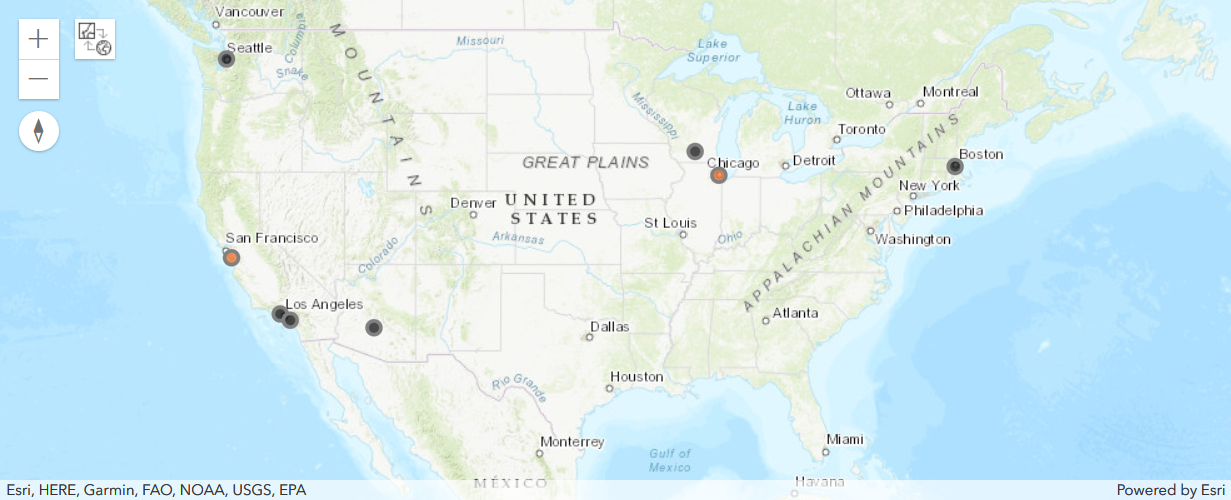

In [78]:
overlap_rows4.spatial.plot(kind='map', map_widget=map3a,
                           renderer_type='c',  # for class breaks renderer
                           method='esriClassifyNaturalBreaks',  # classification algorithm
                           class_count=4,  # choose the number of classes
                           col='Confirmed',  # numeric column to classify
                           cmap='inferno',  # color map to pick colors from for each class
                           alpha=0.7  # specify opacity
                          )

True

## 5. What's next?

This notebook has walked us through steps in accessing the corona viruses statistics, tabularizing them in DataFrames, and finally mapping the outbreak in different regions or counties. The next chapter is to discuss how time-series analysis and charting can be done in ArcGIS API for Python, please stay with us.

## References

[1] https://www.cdc.gov/coronavirus/2019-ncov/about/index.html

[2] https://www.cdc.gov/coronavirus/2019-ncov/summary.html